In [2]:
from keras import models, layers
from keras.datasets import reuters
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

2110848/2110848 [==============================] - 1s 0us/step


((8982,), (2246,), (8982,), (2246,))

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
    print(reverse_word_index.get(_ - 3, '?'), end=' ')

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 

In [7]:
train_labels[0]

3

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [12]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]   

x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [30]:
history = model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 3s 127ms/step - loss: 2.6333 - accuracy: 0.5169 - val_loss: 1.7363 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 1s 89ms/step - loss: 1.4662 - accuracy: 0.6964 - val_loss: 1.3167 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 77ms/step - loss: 1.1205 - accuracy: 0.7548 - val_loss: 1.1640 - val_accuracy: 0.7390
Epoch 4/9
16/16 [==============================] - 1s 72ms/step - loss: 0.9141 - accuracy: 0.7942 - val_loss: 1.0444 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 2s 114ms/step - loss: 0.7623 - accuracy: 0.8345 - val_loss: 1.0041 - val_accuracy: 0.7760
Epoch 6/9
16/16 [==============================] - 1s 87ms/step - loss: 0.6368 - accuracy: 0.8627 - val_loss: 0.9282 - val_accuracy: 0.7960
Epoch 7/9
16/16 [==============================] - 1s 86ms/step - loss: 0.5319 - accuracy: 0.8851 - val_loss: 0.8988 - val_accuracy: 0.8090
Epoch 8/9
16/16 [=

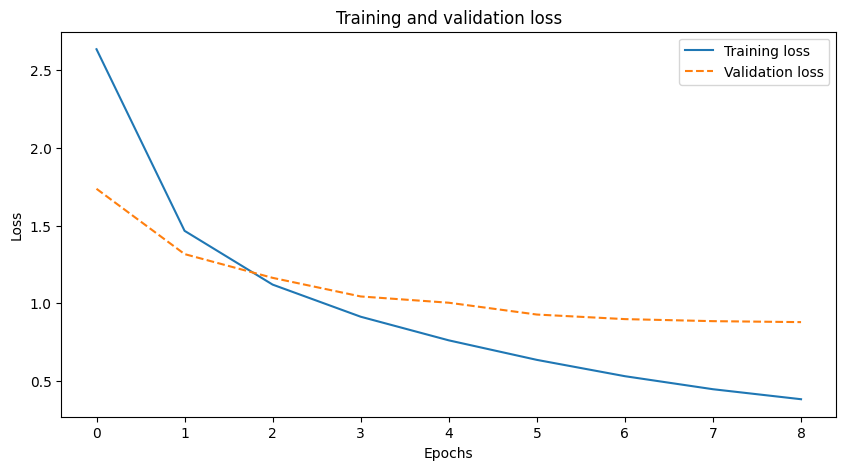

In [31]:
plt.figure(figsize=(10, 5))

plt.plot(
    history.epoch,
    history.history.get('loss'),
    # 'bo',
    label='Training loss'                               
)

plt.plot(
    history.epoch,
    history.history.get('val_loss'),
    '--',
    label='Validation loss'
)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

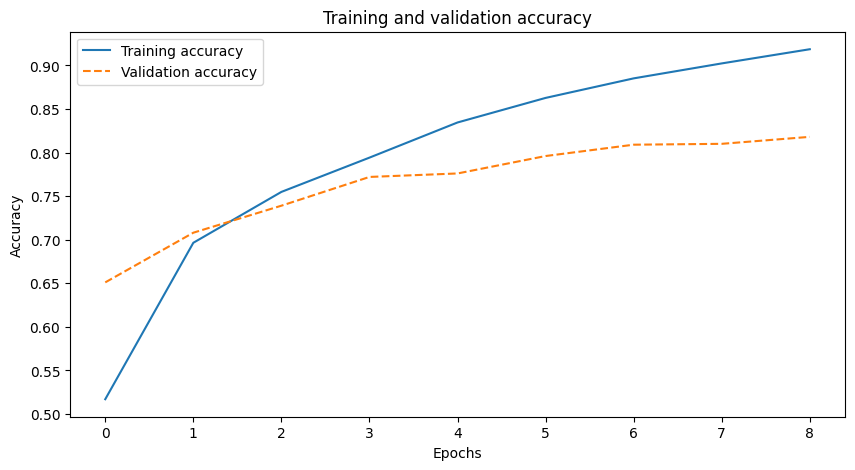

In [32]:
plt.figure(figsize=(10, 5))

plt.plot(
    history.epoch,
    history.history.get('accuracy'),
    # 'bo',
    label='Training accuracy'
)

plt.plot(
    history.epoch,
    history.history.get('val_accuracy'),
    '--',
    label='Validation accuracy'
)

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 0.9486 - accuracy: 0.7841


[0.9485648274421692, 0.784060537815094]

In [34]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 9ms/step


In [38]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
predictions[0]

array([3.88928456e-05, 2.71751305e-05, 2.75551679e-06, 9.83804762e-01,
       1.45599842e-02, 1.81198800e-07, 7.25215205e-06, 1.26735395e-05,
       2.79290281e-04, 5.25046926e-06, 2.01604944e-05, 1.48636009e-05,
       2.83052705e-05, 6.84310144e-05, 1.45252204e-06, 1.30864260e-06,
       5.06895194e-05, 6.95409399e-05, 3.40271276e-06, 1.42364152e-04,
       3.92281625e-04, 1.00955054e-04, 2.32672414e-06, 1.34396751e-05,
       6.32232786e-06, 9.18578280e-06, 8.17613909e-06, 8.55828694e-06,
       4.10471927e-07, 1.09905210e-04, 1.24747703e-05, 4.93706102e-06,
       2.24479700e-05, 6.52520430e-06, 3.86646680e-05, 1.85588954e-06,
       1.14288287e-05, 4.49877871e-06, 5.76127377e-06, 3.97547992e-05,
       1.07117080e-06, 4.70657360e-05, 3.07643376e-07, 8.83193570e-06,
       1.51547295e-06, 2.48595006e-06], dtype=float32)

In [36]:
np.sum(predictions[0])

0.9999999

In [37]:
np.argmax(predictions[0])

3